# Adding Layers
- Why Neural networks become "deep" when they have 2 or more `hidden layers`.
- `Hidden Layer` is a layers between these endpoints "input layers" and "output layers" have values that we don;t necessarily deal with.

In [1]:
import platform
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(platform.python_version())
print(np.__version__)
print(matplotlib. __version__)

#python version 3.9.7
#numpy version 1.21.2
#matplotlib version 3.5.0

3.9.7
1.21.2
3.5.0


In [2]:
# from the previous example we've been calculate the output from a four feature input with 3 neuron
# which the shape of the network was (3, 4) 3 is a batch of training example, and 4 is a number of input features
# and the shape of our neurons is (4, 3) 4 is a number that associate with the input features and 3 is the number of neurons

inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1, 2],
                   [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases = [2, 3, 0.5]

print('inputs shape', inputs.shape)
print('weights shape', weights.T.shape)  # .T == Transpose

inputs shape (3, 4)
weights shape (4, 3)


- To understand this better let's call the output of layer 1 (not include the input feature) `l1` 
- After we calculate the `l1`. `l1` is become the input layer of layer 2 (hidden layer) and the process go-on

In [3]:
inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1, 2],
                   [-1.5, 2.7, 3.3, -0.8]])
# layers 1 contain 3 neurons (shape (4, 3))
weights1 = np.array([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases1 = [2, 3, 0.5]

# layers 2 contain 3 neurons (shape (3, 3))
weights2 = np.array([[0.1, -0.14, 0.5],
                     [-0.5, 0.12, -0.33],
                     [-0.44, 0.73, -0.13]])
biases2 = [-1, 2, -0.5]

# step 1 calculate the output of layer one
l1_output = np.dot(inputs, weights1.T) + biases1
l2_output = np.dot(l1_output, weights2.T) + biases2

print(f'output layer of layer 2 is\n {l2_output}')

output layer of layer 2 is
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Training Data
- The function we use so far is a linear and it isnot so helpful in deeplearning. 
- Imagine we have a non-linear data how suppose a linear function could solve the problems.
- To solve this we need to come up with a new function that could fit it the non-linear data

- To generate a non linear data set we need to download nnfs book dataset by
    - !pip install nnfs

In [4]:
!pip install nnfs

In [5]:
# import dataset 
import nnfs
from nnfs.datasets import spiral_data

# set random seed to 0, create float32 dtype, overrides the original dot product from Numpy
nnfs.init()

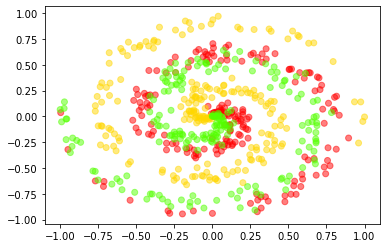

In [6]:
# visualize the datasets
X, y = spiral_data(samples= 200, classes=3)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y, cmap='prism')
plt.show()

## Dense Layers Class

In [14]:
class Dense:
    def __init__(self, n_inputs, n_neurons):
        """ Initialize the weights and biases of each neurons
        n_inputs = number of input features
        n_neurons = number of desired neurons
        """
        # using np.random.randn and * 0.01 is to break the symetry of the neurons
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.01
        # biases can be initialize as zeros
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        """ Calculate the output layer using The Dot product of input feature and weight plus bias
        Input:
        inputs = Training examples
        
        Output:
        output = Output of the training example
        """
        # calculate the output layer
        output = np.dot(inputs, self.weights) + self.biases
        
        return output

In [18]:
# X.shape (600, 2) which mean there are 600 training example, and 2 input features
l1 = Dense(X.shape[1], 5)
l2 = Dense(5, 2)

l1_output = l1.forward(X)
l2_output = l2.forward(l1_output)

print('second output \n', l2_output)

second output 
 [[ 0.0000000e+00  0.0000000e+00]
 [ 6.5848138e-07 -3.4571852e-07]
 [ 4.0929680e-07  1.1278221e-06]
 ...
 [ 1.9601811e-04 -4.8176994e-04]
 [ 1.2793747e-04 -3.9412669e-04]
 [ 2.2039727e-04 -5.1002187e-04]]
